In [1]:
import sys
import os.path
import pylab as plt
plt.style.use('dark_background')
#path = '../zedstat/'
#sys.path.append(path)
from zedstat.zedstat import zedstat
import pandas as pd

In [2]:
df=pd.read_csv('examples_data/roc2.csv')
df=df.sort_values('fpr')
#df=df.drop('threshold',axis=1)

In [3]:
zt=zedstat(df=df,
           order=3,
           total_samples=100000,
           positive_samples=1000,
           alpha=0.1,
           prevalence=.01)

In [4]:
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

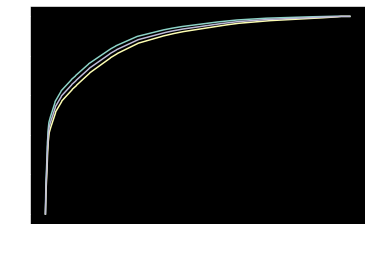

In [5]:
ax=zt.df_lim['U'].tpr.plot()
ax=zt.df_lim['L'].tpr.plot(ax=ax)
ax=zt.get().tpr.plot(ax=ax)

<AxesSubplot:xlabel='LR-'>

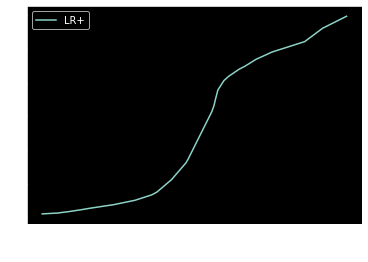

In [6]:
zt.get().plot(x='LR-',y='LR+')

In [13]:
zt.auc(alpha=.02)

(0.8875903790087464, 0.9068020490733194, 0.8681833153664613)

In [18]:
zt.auc_cb2(alpha=.001)
zt._auc

{'U': array([0.90680205, 0.91294492, 0.92469616, 0.92469616, 0.92469616,
        0.92469616, 0.92469616]),
 'L': array([0.86818332, 0.86640845, 0.85878801, 0.85878801, 0.85878801,
        0.85878801, 0.85878801]),
 'nominal': 0.8875903790087464}

In [ ]:
# required sample size
zt.samplesize(delta_auc=.1)

In [ ]:
import numpy as np
pd.DataFrame(np.array([zt.samplesize(delta_auc=a) 
                       for a in np.arange(.05,.1,.001)]),
             np.arange(.05,.1,.001)).plot(logy=True)
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('minimum samples');

In [ ]:
pd.DataFrame([zt.pvalue(delta_auc=a) for a in np.arange(0.001,.1,.001)],
             np.arange(0.001,.1,.001)).plot()
plt.gca().set_ylim(0,0.05)   
plt.gca().set_xlim(0.0196,0.035)   
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('pvalue');

In [ ]:
zt.operating_zone(LRminus=.65)
rf0,txt0=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=10)
rf1,txt1=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=10)
display(zt._operating_zone)
print('high precision operation:\n','\n '.join(txt0))
print('\n')
print('high recall operation:\n','\n '.join(txt1))